# ZCA Whitening



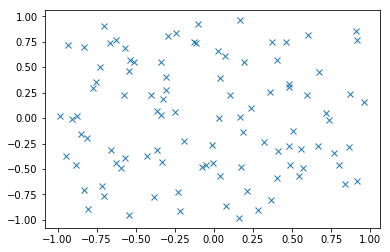

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=-1, upp=1):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

np.random.seed(42)

x1 = get_truncated_normal()
x1 = x1.rvs(100)
x2 = get_truncated_normal()
x2 = x2.rvs(100)
plt.plot(x1, x2, 'x')
plt.show()

In [2]:
y = np.c_[x1, x2].T
y.shape

(2, 100)

In [3]:
sigma = 1 / 100 * y.dot(y.T)
sigma

array([[ 0.30921983, -0.00779793],
       [-0.00779793,  0.29479197]])

In [4]:
w, v = np.linalg.eig(sigma)
w, v

(array([0.31262891, 0.29138288]), array([[ 0.91626552,  0.40057147],
        [-0.40057147,  0.91626552]]))

In [5]:
## Change of basis

x = v.T.dot(y)
x[:2]
cov =  1/ 100 * x.dot(x.T)
cov

array([[3.12628915e-01, 2.44249065e-17],
       [2.44249065e-17, 2.91382881e-01]])

## Whitening step

\begin{align}
x_{\rm PCAwhite,i} = \frac{x_{\rm i} }{\sqrt{\lambda_i}}.   
\end{align}

In [6]:
## Whitening Step

x[0, :] = x[0, :] / np.sqrt(w[0])
x[1, :] = x[1, :] / np.sqrt(w[1])

In [7]:
### Covariance equal to identity matrix

cov =  1/ 100 * x.dot(x.T)
cov

array([[1.00000000e+00, 8.43769499e-17],
       [8.43769499e-17, 1.00000000e+00]])

## ZCA Whitening step

\begin{align}
x_{\rm ZCAwhite} = V x_{\rm PCAwhite}
\end{align}

In [9]:
ZCA = v.dot(x)
ZCA[:2]

array([[-0.41070838,  1.56946388,  0.72637813,  0.30548594, -1.11069922,
        -1.13922262, -1.52839443,  1.22379368,  0.30147966,  0.63578293,
        -1.70581562,  1.6375359 ,  1.10502138, -0.91157678, -1.02813206,
        -1.01169285, -0.60147723,  0.0629421 , -0.19274215, -0.65535696,
         0.3594303 , -1.17393724, -0.66137421, -0.43208745, -0.14672439,
         0.91295255, -0.95589159,  0.05940232,  0.26260669, -1.57626799,
         0.32959455, -1.08648908, -1.51084181,  1.54910688,  1.65204715,
         0.99102023, -0.61233523, -1.34846541,  0.57129223, -0.16283396,
        -1.23796215, -0.02515353, -1.63207569,  1.37741324, -0.77381372,
         0.48571575, -0.58555417,  0.06189196,  0.12362125, -1.03169699,
         1.66856202,  0.87002056,  1.49884156,  1.32588969,  0.32534996,
         1.42743005, -1.38763232, -0.97165145, -1.59317377, -0.53649438,
        -0.35013099, -0.71743865,  1.07755446, -0.44400324, -0.70906493,
         0.14587129, -1.19318974,  0.96277123, -1.4

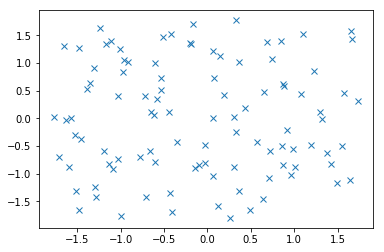

In [11]:
plt.plot(ZCA[0, :], ZCA[1, :], 'x')  #### Much better approximation of original Data